In [25]:
import numpy as np
import pandas as pd
import matplotlib
import datetime
import matplotlib.pyplot as plt

#Here i get the json archive that do reference abrout the CHALLENGETOTVS data
#df = pd.read_json("challenge.json") 
df = pd.read_json("E:\\Projetos\\ChallengeTotvs\\Challenge\\challenge.json")
#"Exibindo primeiras linhas do DataSet: "
df.head()

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204428 entries, 0 to 204427
Data columns (total 14 columns):
customer_code       204428 non-null int64
branch_id           204428 non-null int64
sales_channel       204428 non-null int64
seller_code         204428 non-null int64
register_date       204428 non-null object
total_price         204428 non-null float64
order_id            204428 non-null int64
quantity            204428 non-null int64
item_code           204428 non-null int64
item_total_price    204428 non-null float64
unit_price          204428 non-null float64
group_code          204428 non-null int64
segment_code        204428 non-null int64
is_churn            202513 non-null float64
dtypes: float64(4), int64(9), object(1)
memory usage: 21.8+ MB


In [11]:
#"Describe da tabela:
df.describe()

,customer_code,branch_id,sales_channel,seller_code,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
count,204428.000000,204428.0,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,202513.000000
mean,447.489062,0.0,1.761182,145.543022,5337.072931,12434.088863,12.332694,1437.298981,304.048244,47.456664,0.307184,0.846381,0.191168
std,246.678026,0.0,2.929541,75.197609,21268.855032,6935.623011,53.299314,903.166319,1009.268287,145.295694,0.714639,1.615763,0.393222
min,0.000000,0.0,0.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
25%,221.000000,0.0,0.000000,83.000000,1180.470000,6497.750000,3.000000,631.000000,79.600000,14.670000,0.000000,0.000000,0.000000
50%,486.000000,0.0,0.000000,156.000000,2035.820000,12698.000000,6.000000,1455.000000,156.150000,21.780000,0.000000,0.000000,0.000000
75%,651.000000,0.0,2.000000,195.000000,3611.070000,18280.000000,12.000000,2048.000000,293.862500,46.720000,0.000000,2.000000,0.000000
max,837.000000,0.0,105.000000,289.000000,428976.460000,24617.000000,7000.000000,2980.000000,102951.110000,26280.000000,3.000000,7.000000,1.000000


In [12]:
#"Verificando a quantidade de valores de cada coluna: ")
df.count()

customer_code       204428
branch_id           204428
sales_channel       204428
seller_code         204428
register_date       204428
total_price         204428
order_id            204428
quantity            204428
item_code           204428
item_total_price    204428
unit_price          204428
group_code          204428
segment_code        204428
is_churn            202513
dtype: int64

In [13]:
#"\Contagem de numeros nulos: \n", 
df.isnull().sum()

customer_code          0
branch_id              0
sales_channel          0
seller_code            0
register_date          0
total_price            0
order_id               0
quantity               0
item_code              0
item_total_price       0
unit_price             0
group_code             0
segment_code           0
is_churn            1915
dtype: int64

In [14]:
df_clean = df
df_clean.head()

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0


In [26]:
#Aqui crio uma nova coluna date com os dados da coluna registrer_date formatados
df_clean['date'] = pd.to_datetime(df_clean['register_date'], infer_datetime_format=True)

In [27]:
import calendar

df_clean["year"] = df_clean["date"].astype(str).str[:4].astype(np.int64)
df_clean["month"] = df_clean["date"].astype(str).str[5:7].astype(np.int64)
df_clean['date'] = pd.to_datetime(df_clean['date'], errors ='coerce')
df_clean['day_of_week'] = df_clean['date'].dt.weekday_name


df_clean["year"] = df_clean["year"].astype(str)
df_clean.head()

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,date,year,month,day_of_week
0,143,0,0,190,2017-11-10T00:00:00Z,1613.53,21804,10,854,292.91,25.04,0,0,0.0,2017-11-10,2017,11,Friday
1,433,0,1,153,2011-05-16T00:00:00Z,11163.69,5486,20,246,287.19,12.33,0,5,0.0,2011-05-16,2011,5,Monday
2,486,0,0,166,2018-01-24T00:00:00Z,6432.12,22662,12,1420,184.84,12.80,0,0,0.0,2018-01-24,2018,1,Wednesday
3,107,0,1,156,2010-07-28T00:00:00Z,831.82,3956,18,1963,189.18,10.51,0,0,0.0,2010-07-28,2010,7,Wednesday
4,768,0,1,218,2010-12-17T00:00:00Z,1736.48,4730,5,1786,66.87,11.82,0,0,0.0,2010-12-17,2010,12,Friday


In [28]:
#Crio tabela df_order ordenada por cliente e data da compra
df_order = df_clean.sort_values(['customer_code', 'date'], ascending = True)
df_order.head()

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,date,year,month,day_of_week
12619,0,0,8,153,2008-09-23T00:00:00Z,4721.62,967,12,722,1063.67,71.20,0,0,0.0,2008-09-23,2008,9,Tuesday
18342,0,0,8,153,2008-09-23T00:00:00Z,4721.62,967,6,1960,234.25,31.36,0,0,0.0,2008-09-23,2008,9,Tuesday
23817,0,0,8,153,2008-09-23T00:00:00Z,4721.62,967,4,2864,220.25,44.90,0,0,0.0,2008-09-23,2008,9,Tuesday
29444,0,0,8,153,2008-09-23T00:00:00Z,4721.62,967,12,2843,124.50,8.46,0,0,0.0,2008-09-23,2008,9,Tuesday
42380,0,0,8,153,2008-09-23T00:00:00Z,4721.62,967,12,2861,315.50,21.44,0,0,0.0,2008-09-23,2008,9,Tuesday


In [29]:
#df1 ira receber apenas linhas sem valores nulos
#df2 ira receber apenas linhas com valores nulos
df1 = df_order.dropna()
df2 = df_order[pd.isnull(df_order).any(axis=1)]

In [19]:
df1.shape

(202513, 18)

In [20]:
df2.shape

(1915, 18)

In [21]:
df_order.nunique()

customer_code         838
branch_id               1
sales_channel         106
seller_code           290
register_date        3121
total_price         22713
order_id            24618
quantity              290
item_code            2981
item_total_price    55336
unit_price          19828
group_code              4
segment_code            8
is_churn                2
date                 3121
year                   11
month                  12
day_of_week             7
dtype: int64

In [22]:
df1.nunique()

customer_code         818
branch_id               1
sales_channel         106
seller_code           289
register_date        3119
total_price         22499
order_id            24380
quantity              290
item_code            2968
item_total_price    55100
unit_price          19756
group_code              3
segment_code            7
is_churn                2
date                 3119
year                   11
month                  12
day_of_week             7
dtype: int64

In [23]:
df2.nunique()

customer_code         20
branch_id              1
sales_channel          6
seller_code           25
register_date        209
total_price          235
order_id             238
quantity              46
item_code            390
item_total_price    1685
unit_price          1355
group_code             1
segment_code           1
is_churn               0
date                 209
year                  11
month                 12
day_of_week            7
dtype: int64

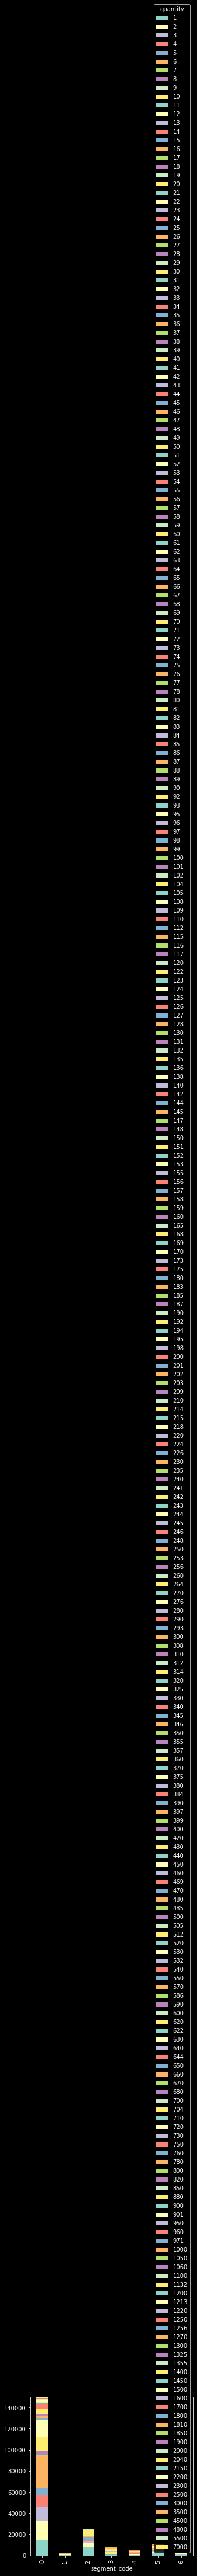

In [30]:
df1.groupby(["segment_code", "quantity"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 
plt.show()

In [16]:
# remove todas as linhas cujo scouts sÃƒÆ’Ã‚Â£o NANs 
df_clean = df.dropna()
#'qtde. de clientes com dados, sem valores nulos: ', 
df_clean.shape[0]

202513

In [17]:
#\Contagem de numeros nulos: \n", 
df_clean.isnull().sum()

customer_code       0
branch_id           0
sales_channel       0
seller_code         0
register_date       0
total_price         0
order_id            0
quantity            0
item_code           0
item_total_price    0
unit_price          0
group_code          0
segment_code        0
is_churn            0
date                0
year                0
month               0
day_of_week         0
dtype: int64

In [18]:
#Verificando a quantidade de valores de cada coluna na tabela limpa: ")
df_clean.count()

customer_code       202513
branch_id           202513
sales_channel       202513
seller_code         202513
register_date       202513
total_price         202513
order_id            202513
quantity            202513
item_code           202513
item_total_price    202513
unit_price          202513
group_code          202513
segment_code        202513
is_churn            202513
date                202513
year                202513
month               202513
day_of_week         202513
dtype: int64

In [19]:
df_clean['is_churn'].value_counts()

0.0    163799
1.0     38714
Name: is_churn, dtype: int64

In [20]:
df_clean.is_churn.value_counts()

0.0    163799
1.0     38714
Name: is_churn, dtype: int64

In [21]:
df_clean.is_churn.value_counts(normalize=True)

0.0    0.808832
1.0    0.191168
Name: is_churn, dtype: float64

In [22]:
df_clean.columns

Index(['customer_code', 'branch_id', 'sales_channel', 'seller_code',
       'register_date', 'total_price', 'order_id', 'quantity', 'item_code',
       'item_total_price', 'unit_price', 'group_code', 'segment_code',
       'is_churn', 'date', 'year', 'month', 'day_of_week'],
      dtype='object')

In [23]:
df_clean.sort_values(by='quantity', ascending=False).head()

,customer_code,branch_id,sales_channel,seller_code,register_date,total_price,order_id,quantity,item_code,item_total_price,unit_price,group_code,segment_code,is_churn,date,year,month,day_of_week
139957,110,0,0,80,2017-03-06T00:00:00Z,100615.10,19140,7000,94,102951.11,14.28,0,4,1.0,2017-03-06,2017,3,Monday
145468,110,0,0,80,2016-11-09T00:00:00Z,89759.50,18197,5500,94,80890.15,14.28,0,4,1.0,2016-11-09,2016,11,Wednesday
149118,658,0,0,147,2017-05-31T00:00:00Z,134834.83,19967,4800,2624,62160.00,12.95,1,3,1.0,2017-05-31,2017,5,Wednesday
3490,658,0,0,147,2017-04-25T00:00:00Z,44550.00,19591,4500,416,44550.00,9.90,1,3,1.0,2017-04-25,2017,4,Tuesday
79983,110,0,0,80,2017-10-16T00:00:00Z,52635.40,21500,3500,94,52629.07,14.60,0,4,1.0,2017-10-16,2017,10,Monday
